In [33]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.42724161 0.27990797 0.43217084 ... 0.25633731 0.24276918 0.39095673]
 [0.25304269 0.16578129 0.25596213 ... 0.15182108 0.14378507 0.23155222]
 [0.6100916  0.39970241 0.61713044 ... 0.36604403 0.34666903 0.5582776 ]
 ...
 [0.4650369  0.30466961 0.4704022  ... 0.27901381 0.26424539 0.42554214]
 [0.31457258 0.20609269 0.31820191 ... 0.18873791 0.17874786 0.28785648]
 [0.54606843 0.35775754 0.55236861 ... 0.32763127 0.31028949 0.4996918 ]]

Noisy Matrix (with Homoscedastic Noise):
[[0.28589878 0.2837296  0.56798005 ... 0.406902   0.26221088 0.28210698]
 [0.32697568 0.30151765 0.31870541 ... 0.20105822 0.1700783  0.31983726]
 [0.82119486 0.31744607 0.55715058 ... 0.50480787 0.30939541 0.45827903]
 ...
 [0.51509939 0.23808167 0.46431479 ... 0.3455443  0.32805628 0.29118722]
 [0.2214211  0.13863566 0.3223443  ... 0.16379274 0.07995705 0.31555328]
 [0.37299167 0.30207758 0.51153064 ... 0.32150612 0.35229918 0.54186878]]


In [34]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [35]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [36]:
K = np.min([K, U.shape[1]])
print(K)

5


In [37]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[ 0.0858869   0.26968119  0.02705042 -0.38963718  0.00233482 -0.21707378
 -0.01545167  0.22689259  0.15588731 -0.17074803  0.1108507   0.08261709
 -0.07788622  0.12450538  0.28053112  0.28730878 -0.08471681 -0.11981543
  0.31956217  0.13742932 -0.38488057 -0.06235787 -0.21511274 -0.232019
  0.19566319  0.00931485  0.08856651 -0.0271579  -0.39143339 -0.05707462
  0.00371402  0.06379258 -0.149898    0.22007645  0.05013856  0.03339656
  0.35630994  0.26053672 -0.02069951 -0.14979296  0.00872051 -0.09461996
 -0.0081161  -0.35097799 -0.02988849  0.05879638 -0.076455    0.12885775
  0.05553871 -0.03300181]
[ 0.08531981 -0.09797635 -0.23553052  0.04870384 -0.12097036  0.31876062
  0.01196268 -0.37400177  0.02607842  0.00384063  0.05055715  0.15468478
  0.04193628  0.04813744 -0.16581854  0.11310165  0.3042211  -0.02192085
  0.03410115 -0.3368725   0.0287411   0.33737176  0.08511173  0.03026691
 -0.05939605 -0.12704057 -0.00216639 -0.08226221 -0.0

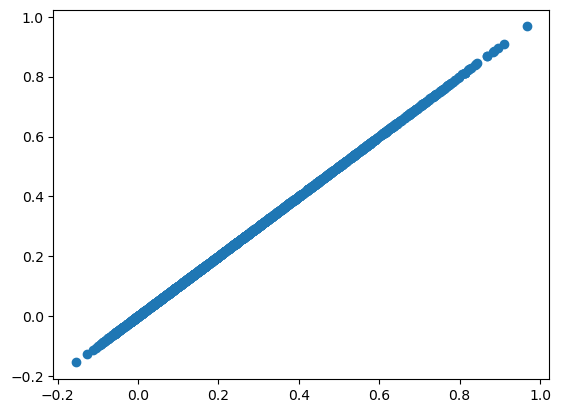

In [38]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

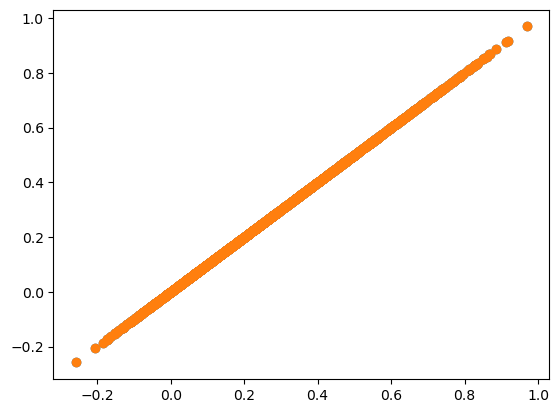

In [39]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [40]:
mycebmf.update_tau()
mycebmf.tau

array([[145.43624717, 145.43624717, 145.43624717, ..., 145.43624717,
        145.43624717, 145.43624717],
       [145.43624717, 145.43624717, 145.43624717, ..., 145.43624717,
        145.43624717, 145.43624717],
       [145.43624717, 145.43624717, 145.43624717, ..., 145.43624717,
        145.43624717, 145.43624717],
       ...,
       [145.43624717, 145.43624717, 145.43624717, ..., 145.43624717,
        145.43624717, 145.43624717],
       [145.43624717, 145.43624717, 145.43624717, ..., 145.43624717,
        145.43624717, 145.43624717],
       [145.43624717, 145.43624717, 145.43624717, ..., 145.43624717,
        145.43624717, 145.43624717]])

In [41]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [42]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-1.95457075e-01, -1.31652845e-01, -2.21431389e-01, -1.35041164e-01,
        -2.17516372e-01, -6.72202697e-02, -5.11135106e-02, -2.36852795e-01,
        -1.94225661e-01, -1.97054118e-01, -2.26043567e-01, -2.43518896e-01,
        -1.63925631e-01, -8.29315988e-02, -1.93918026e-02, -1.52947491e-01,
        -8.87188751e-02, -5.37476027e-02, -4.61604538e-02, -2.13288097e-01,
        -6.99270131e-02, -2.16834885e-01, -2.18781278e-01, -2.41431556e-01,
        -1.36913031e-01, -1.26127529e-02, -6.92057026e-02,  2.41067690e-04,
        -2.68545662e-02, -2.25521925e-01, -1.67978007e-01, -6.38142381e-02,
        -2.17886064e-01, -1.50831805e-02, -1.83474603e-01, -1.86172986e-01,
        -9.54639214e-02, -1.23975912e-01, -1.21378861e-01, -2.06787218e-01]),
 array([0.00563979, 0.00563979, 0.00563979, 0.00563979, 0.00563979,
        0.00563979, 0.00563979, 0.00563979, 0.00563979, 0.00563979,
        0.00563979, 0.00563979, 0.00563979, 0.00563979, 0.00563979,
        0.00563979, 0.00563979, 0.

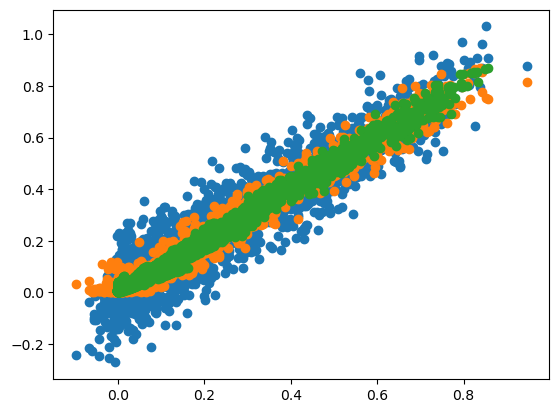

In [43]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


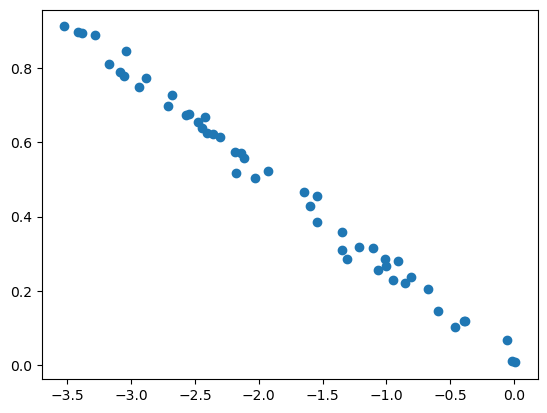

In [44]:
plt.scatter(mycebmf.L[:,0], u)

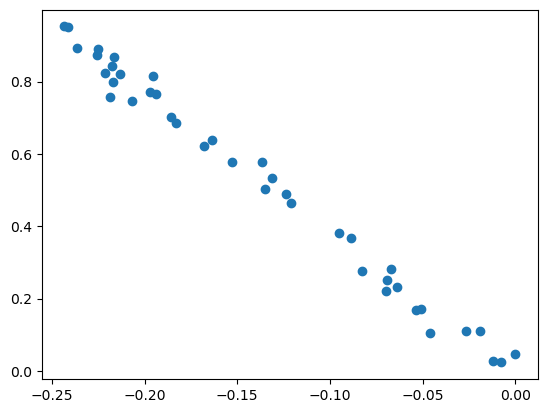

In [45]:
plt.scatter(mycebmf.F[:,0], v)

In [46]:
mycebmf.L[:,1]

array([ 2.10839889e-02,  2.25565506e-01,  4.36358284e-03, -3.44276284e-01,
        3.37829040e-04, -1.64737419e-01, -2.84394962e-03,  1.72965045e-01,
        7.47034845e-02, -9.64686025e-02,  3.35671141e-02,  1.95943316e-02,
       -1.93083702e-02,  4.37234391e-02,  2.37716917e-01,  2.44680473e-01,
       -2.32124953e-02, -4.15695124e-02,  2.75808556e-01,  5.46027626e-02,
       -3.43440089e-01, -1.41360851e-02, -1.60287980e-01, -1.85388309e-01,
        1.23085972e-01,  1.20438442e-03,  2.19381122e-02, -5.48702474e-03,
       -3.46841414e-01, -1.23536667e-02,  7.01631644e-05,  1.37822624e-02,
       -7.14013401e-02,  1.60369140e-01,  9.96193668e-03,  6.23779314e-03,
        3.09448439e-01,  2.13232376e-01, -4.43719213e-03, -7.18426782e-02,
        1.11095826e-03, -2.67091402e-02, -2.16453599e-03, -3.09642092e-01,
       -5.87533031e-03,  1.15705945e-02, -1.99148870e-02,  4.60197275e-02,
        1.11877572e-02, -6.94550082e-03])

In [47]:
for i in range(40):
    mycebmf.iter()

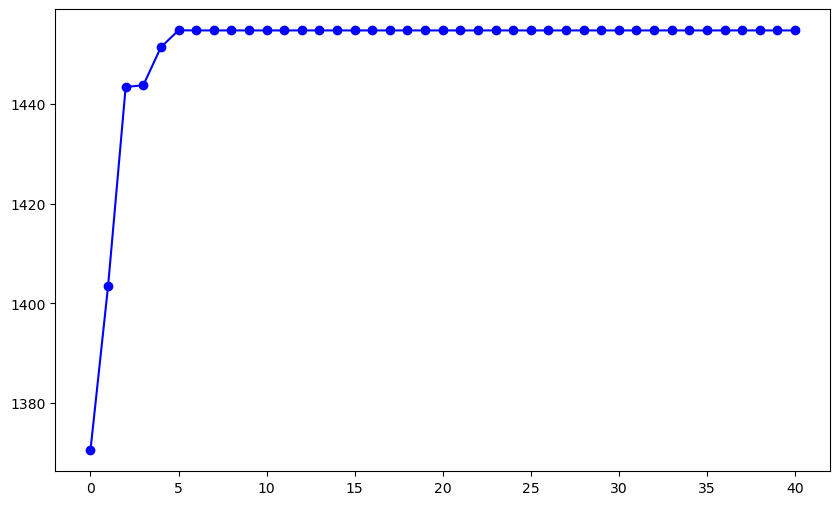

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')